In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline plotting in Jupyter
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
X = torch.linspace(-1, 1, 200).unsqueeze(1)


In [3]:
y = 1 / (1 + np.exp(-X))


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, inp=1, h2=5, h3=10, h4=10, h5=10, h6=10, h7=10, h8=5, outp=1):
        super().__init__()
        # Define all layers in one place for clarity
        self.layers = nn.Sequential(
            nn.Linear(inp, h2),
            nn.ReLU(),
            nn.Linear(h2, h3),
            nn.ReLU(),
            nn.Linear(h3, h4),
            nn.ReLU(),
            nn.Linear(h4, h5),
            nn.ReLU(),
            nn.Linear(h5, h6),
            nn.ReLU(),
            nn.Linear(h6, h7),
            nn.ReLU(),
            nn.Linear(h7, h8),
            nn.ReLU(),
            nn.Linear(h8, outp)
        )

    def forward(self, x):
        # Forward pass through the sequential layers
        return self.layers(x)


In [5]:
model = Model()


In [6]:
criterion_loss = nn.MSELoss()


In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming the Model class, criterion_loss, and optimizer are defined as before

epochs = 2000
losses = []
grad_norm_list = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    
    # Calculate loss
    loss = criterion_loss(y_pred, y)
    losses.append(loss.item())
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Get gradient norm
    grad_all = 0.0
    for p in model.parameters():
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
            grad_all += grad
    grad_norm = grad_all ** 0.5
    grad_norm_list.append(grad_norm)

print(f"Training completed over {epochs} epochs.")


Training completed over 2000 epochs.


In [11]:
losses = torch.tensor(losses)


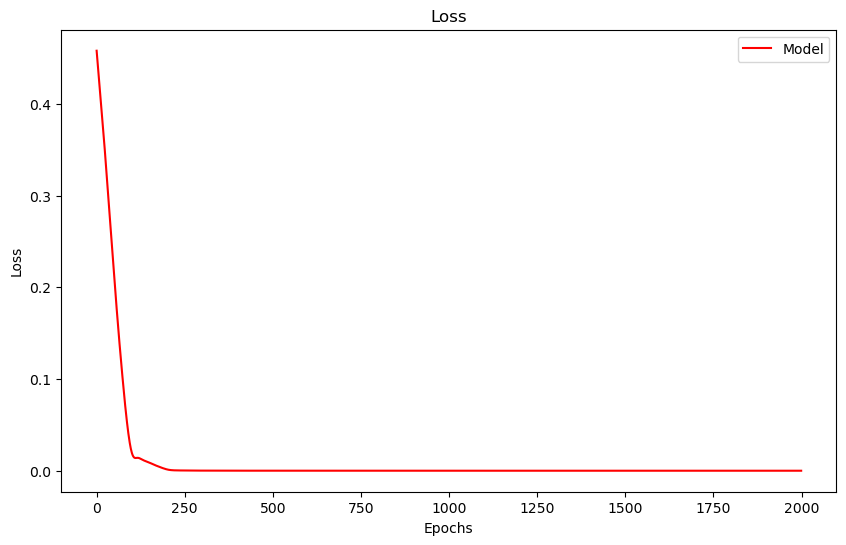

In [12]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(range(epochs), losses.numpy(), 'r', label='Model')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()


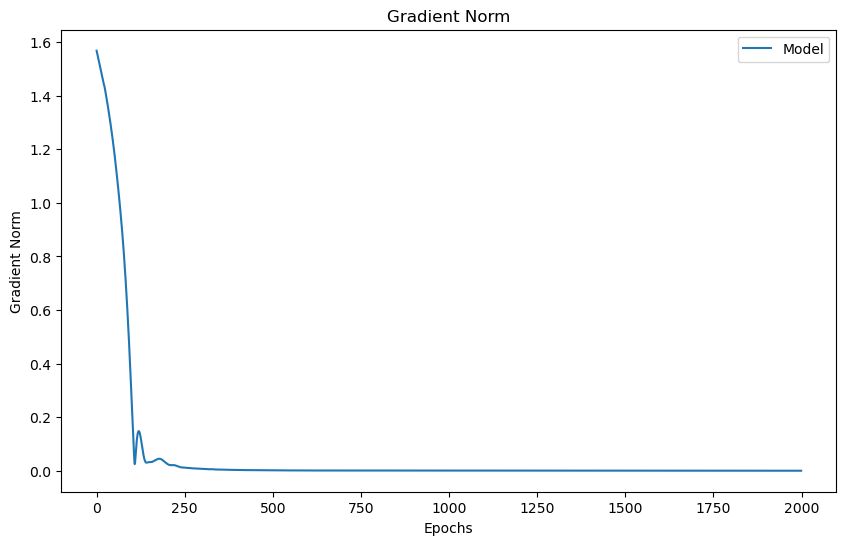

In [13]:
import matplotlib.pyplot as plt

# Plot the gradient norm over epochs
plt.plot(range(epochs), grad_norm_list, label='Model')
plt.title("Gradient Norm")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()
